In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import sys
import importlib
sys.path.append('../')

import utils
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\USUARIO\\Desktop\\Projects\\4Geeks_temporal_series\\src\\water_spring\\..\\utils.py'>

In [15]:
df = pd.read_csv('../../data/raw/Water_Spring_Lupa.csv')
df = utils.turn_column_into_date(df, 'Date')
df.head()

,Rainfall_Terni,Flow_Rate_Lupa
Date,,
2009-01-01,2.797,NaN
2009-01-02,2.797,NaN
2009-01-03,2.797,NaN
2009-01-04,2.797,NaN
2009-01-05,2.797,NaN


# Valores faltantes

In [16]:
utils.get_null_percentage_per_column(df)

Flow_Rate_Lupa    9.097404
Rainfall_Terni    0.000000
dtype: float64

In [17]:
df = utils.remove_columns_with_nulls_percent(df, threshold=50)
df = utils.interpolate_df(df)

Columnas eliminadas por alto porcentaje de valores nulos (50%): []
Valores nulos después de la interpolación:
Series([], dtype: int64)


c:\Users\USUARIO\Desktop\Projects\4Geeks_temporal_series\src\water_spring\..\utils.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Relleno hacia adelante
c:\Users\USUARIO\Desktop\Projects\4Geeks_temporal_series\src\water_spring\..\utils.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Relleno hacia atrás


In [18]:
utils.get_null_percentage_per_column(df)

Rainfall_Terni    0.0
Flow_Rate_Lupa    0.0
dtype: float64

# Análisis de tendencias

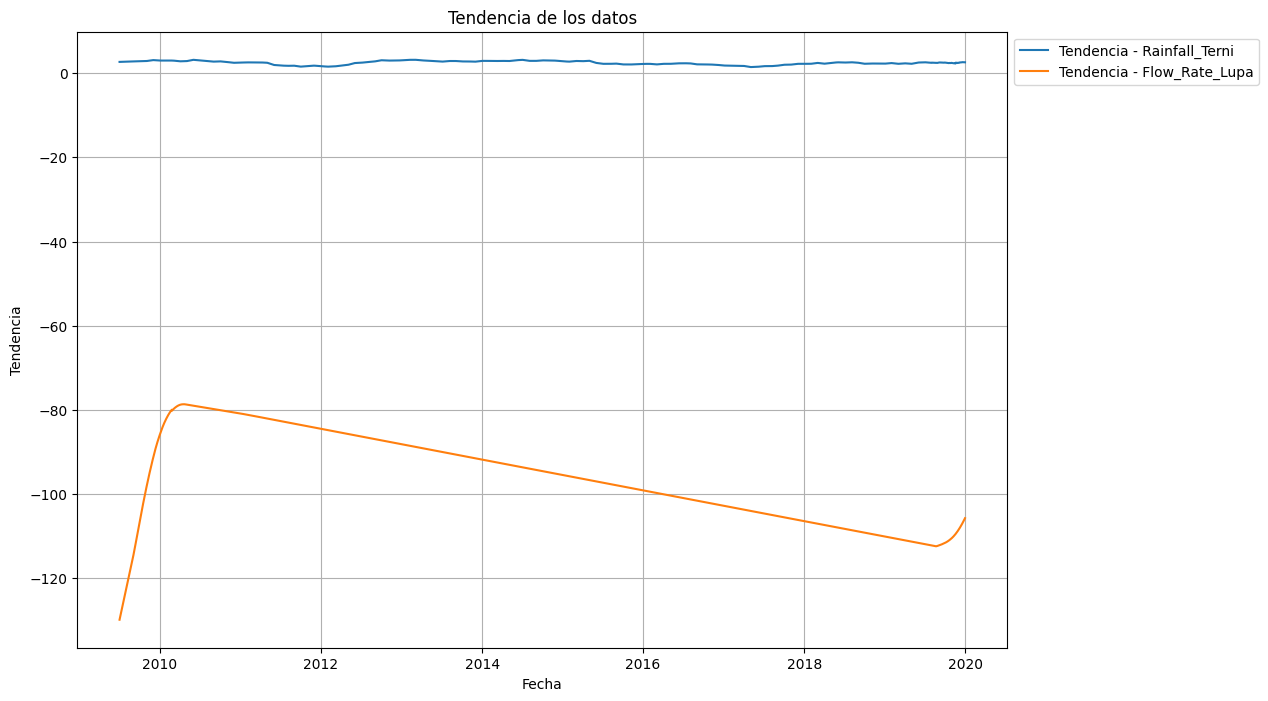

In [19]:
utils.plot_trend(df, period=365)

# Análisis de estacionalidad

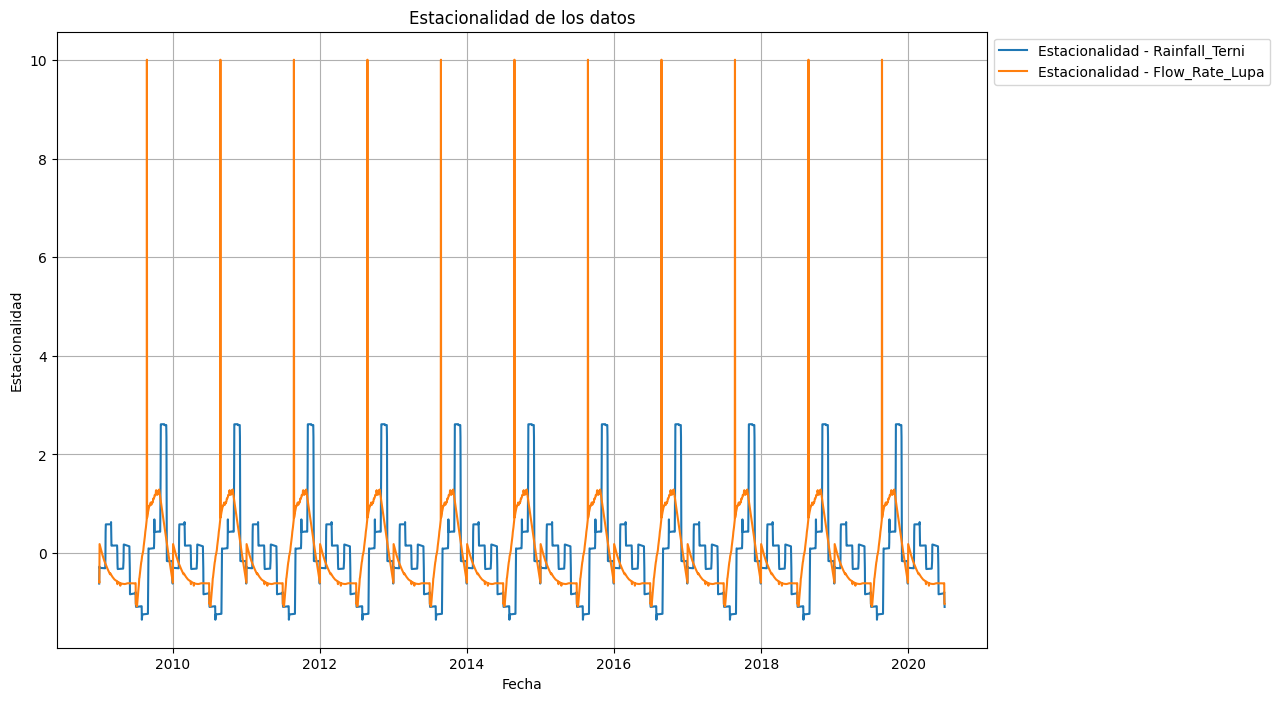

In [20]:
utils.plot_seasonality(df, period=365)

# Prueba de estacionariedad

In [21]:
utils.test_stationarity(df)

Resultados de la prueba de Dickey-Fuller para 'Rainfall_Terni':
Test Statistic                -9.088663e+00
p-value                        3.877603e-15
#Lags Used                     3.100000e+01
Number of Observations Used    4.167000e+03
Critical Value (1%)           -3.431920e+00
Critical Value (5%)           -2.862234e+00
Critical Value (10%)          -2.567139e+00
dtype: float64
--------------------------------------------------------------------------------
Resultados de la prueba de Dickey-Fuller para 'Flow_Rate_Lupa':
Test Statistic                   -3.692365
p-value                           0.004222
#Lags Used                       31.000000
Number of Observations Used    4167.000000
Critical Value (1%)              -3.431920
Critical Value (5%)              -2.862234
Critical Value (10%)             -2.567139
dtype: float64
--------------------------------------------------------------------------------


# Análisis de variabilidad

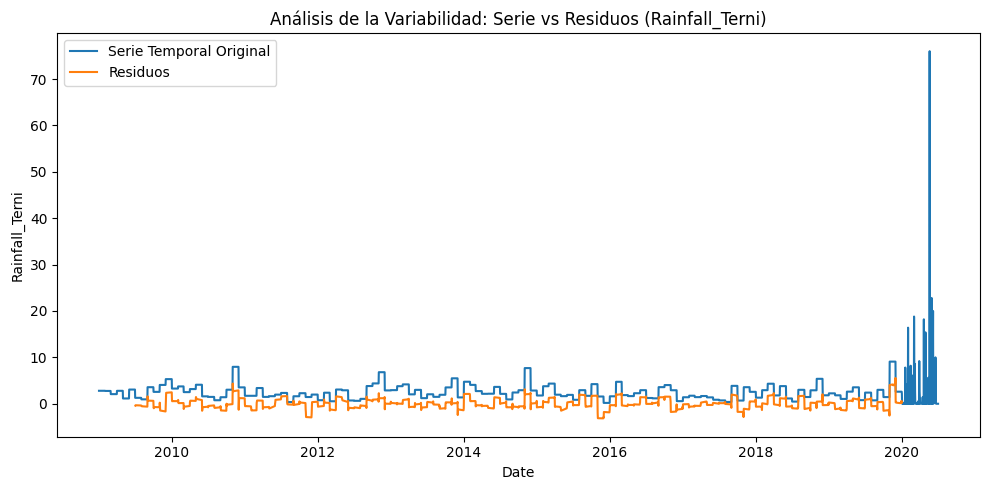

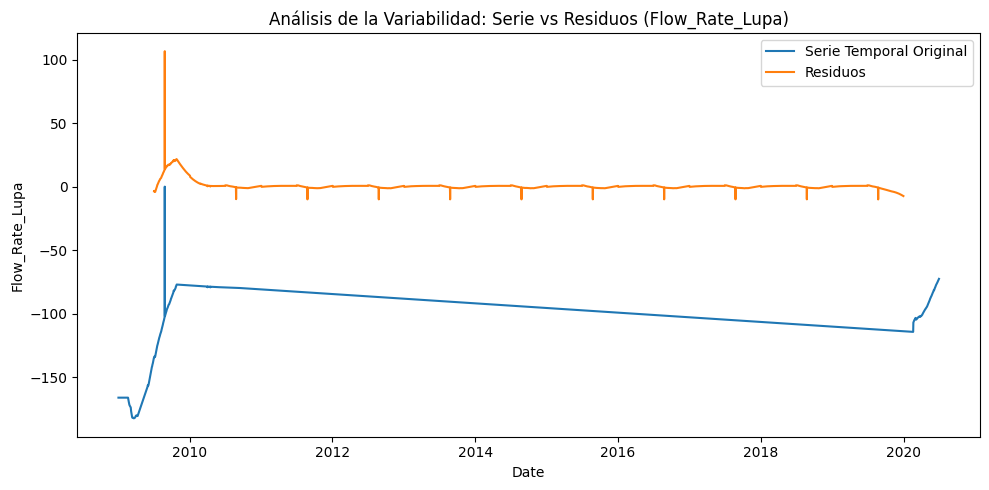

In [22]:
utils.plot_variability(df, period=365)

# Análisis de autocorrelación

<Figure size 1000x500 with 0 Axes>

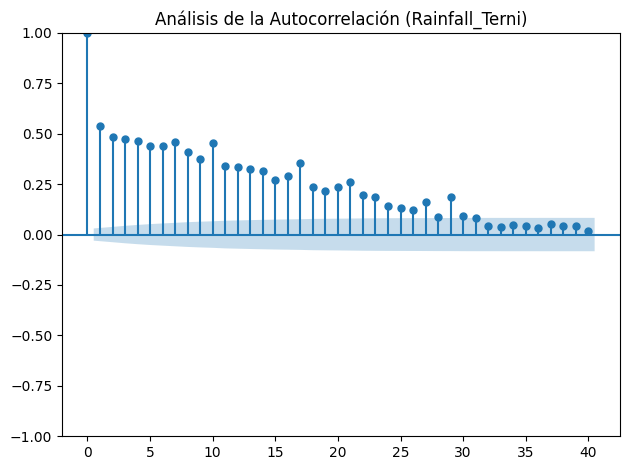

<Figure size 1000x500 with 0 Axes>

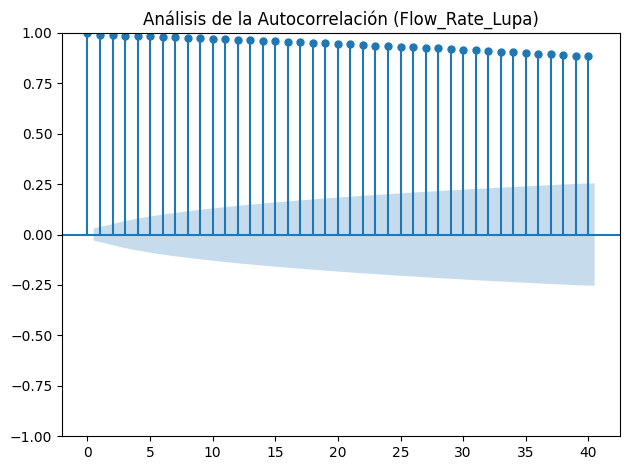

In [23]:
utils.plot_autocorrelation(df)

In [24]:
df = df.rename(columns={"Rainfall_Terni": "Rainfall"})

In [25]:
df.to_csv("../../data/processed/water_spring_lupa.csv", index=True)